# SBM model generation

In [1]:
from scipy.special import expit as logistic
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
def generate_clusters(n = 21, pi_vector = [0.3,0.4,0.3]):
    clusters_splits = list((np.round(n*np.cumsum(pi_vector)).astype('int')))
    k = len(pi_vector)
    c = np.zeros(n) 
    for k_ind in range(k-1):
        print(k_ind)
        c[clusters_splits[k_ind]:clusters_splits[k_ind+1]]=k_ind+1
    return c
c = generate_clusters()

0
1


In [9]:
c

array([0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2.])

In [4]:
n = 21
pi_vector = [0.3,0.4,0.3]
clusters_splits = list((np.round(n*np.cumsum(pi_vector)).astype('int')))
list((np.round(n*np.cumsum(pi_vector)).astype('int')))

[6, 15, 21]

In [11]:
k_ind = 0
c[0:1]

array([0.])

In [3]:
def generate_sbm_adj(n,pi_vector,theta_in,theta_out):
    c = generate_clusters(n,pi_vector)
    Adj = np.zeros((n,n))
    for i in range(n-1):
        for j in range(i+1,n):
            if c[i]==c[j]:
                Adj[i,j] = int(np.random.randint(100)<100*theta_in)
                Adj[j,i] = Adj[i,j]
            else:
                Adj[i,j] = int(np.random.randint(100)<100*theta_out)
                Adj[j,i] = Adj[i,j]
    return Adj 

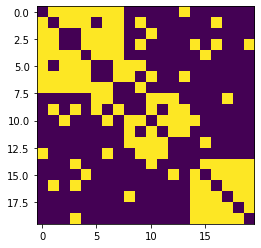

In [4]:
Adj = generate_sbm_adj(20,[0.4,0.3, 0.3],theta_in = 0.9,theta_out = 0.1)
plt.imshow(Adj)

## Weighted
Можно взять простую структуру, когда вместо theta_in,theta_out - параметры распределения (например средние для нормального распределения), моделирующее более сильную связь внутри класса. Вообще интересно поанализировать и параметры распределения, но не сейчас.

In [5]:
def generate_wsbm_adj(n,pi_vector,theta_in = 3,theta_out = -3):
    c = generate_clusters(n,pi_vector)
    Adj = np.zeros((n,n))
    for i in range(n-1):
        for j in range(i+1,n):
            if c[i]==c[j]:
                Adj[i,j] = logistic(norm.rvs(theta_in))
                Adj[j,i] = Adj[i,j]
            else:
                Adj[i,j] = logistic(norm.rvs(theta_out))
                Adj[j,i] = Adj[i,j]
    np.fill_diagonal(Adj, 1)           
    return Adj 

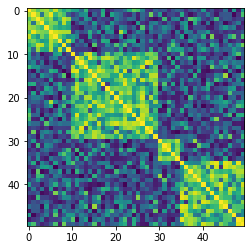

In [6]:
wAdj = generate_wsbm_adj(50,[0.2,0.4,0.1,0.3],theta_in = 1,theta_out = -1)
plt.imshow(wAdj)

In [7]:
def random_permute(matrix):
    n = wAdj.shape[0]
    order  = np.random.permutation(n)
    permuted = np.zeros((n,n))
    for i in range(n-1):
        for j in range(i+1,n):
            permuted[i,j] = matrix[order[i],order[j]]
            permuted[j,i] = matrix[order[j],order[i]]
    return order, permuted   
def inverse_permute(order, permuted):
    n = permuted.shape[0]
    new_order  = np.argsort(order)
    inverse = np.zeros((n,n))
    for i in range(n-1):
        for j in range(i+1,n):
            inverse[i,j] = permuted[new_order[i],new_order[j]]
            inverse[j,i] = permuted[new_order[j],new_order[i]]
    return inverse

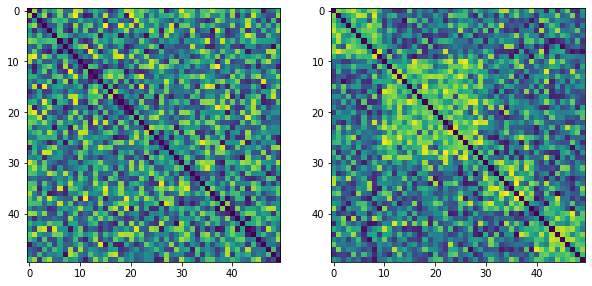

In [13]:
plt.figure(figsize = (10,5))
wAdj = generate_wsbm_adj(50,[0.2,0.4,0.2,0.2],theta_in = 0.8,theta_out = -0.5)
order,permuted =random_permute(wAdj)
plt.subplot(121); plt.imshow(permuted)
plt.subplot(122); plt.imshow(inverse_permute(order, permuted))

Вот наша задача - уметь понимать про блоки независимо от того как матрица выглядит

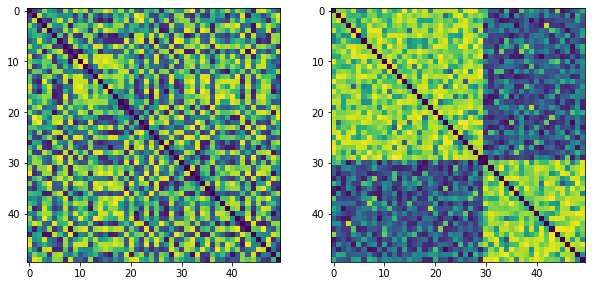

In [11]:
plt.figure(figsize = (10,5))
wAdj = generate_wsbm_adj(50,[0.6,0.4],theta_in = 1.5,theta_out = -1)
order,permuted =random_permute(wAdj)
plt.subplot(121); plt.imshow(permuted)
plt.subplot(122); plt.imshow(inverse_permute(order, permuted))

In [ ]:
# Вообще можно посмотреть что про